# 1. Import Libraries

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, roc_auc_score ,roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load Data

In [2]:
drive.mount('/content/drive')
mon_features=pd.read_csv('/content/drive/MyDrive/mon_features (6).csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/mon_labels (1).csv')



Mounted at /content/drive


# 3. Preprocess Data


In [3]:
# Feature selection based on features/mon_feature_information
# mon_features = mon_features[['total_num', 'total_sum_dir', 'inpkt_num', 'inpkt_avg_ordering',
#       'inpkt_std_ordering', 'outpkt_num', 'outpkt_avg_ordering',
#       'outpkt_std_ordering', 'inpkt_count_burst', 'outpkt_count_burst']]

In [4]:
X = mon_features
y = mon_labels

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Train/Test Shape:", X_train.shape, X_test.shape)

Data Train/Test Shape: (15200, 27) (3800, 27)


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

# 4. Model selection

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [11]:
#하이퍼파라미터 튜닝(GridSearch)
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_leaf_nodes': [50, 100, 200, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [14]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=1,
    verbose=2

)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  25.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  23.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  25.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  42.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  41.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  42.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=  29.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=  29.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  54.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  54.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  59.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  47.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  48.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  29.0s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  28.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  28.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  30.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  32.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  35.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  35.0s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  33.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  41.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  41.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  51.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  55.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  50.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  33.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=20, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  32.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  51.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  51.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  51.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  34.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  33.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  35.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=200, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  34.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  25.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  24.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  41.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  41.0s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  46.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  45.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  46.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  28.0s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  26.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  39.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  40.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=  37.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  28.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=10, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=  43.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=  42.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=  40.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  55.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  53.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  53.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  43.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  51.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  51.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  33.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  33.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=200, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  31.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=20, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=  24.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  56.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  54.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  54.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  27.3s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=10, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  47.4s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  48.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=None, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  47.0s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  40.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  38.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced, max_depth=30, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  40.6s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  34.8s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END class_weight=balanced_subsample, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=  33.7s


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_leaf_nodes': [50, 100, 200, None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_depth': None, 'class_weight': 'balanced_subsample'}
Best Score: 0.7232895362168005

Accuracy: 0.7394736842105263

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66        42
           1       0.66      0.50      0.57        42
           2       0.80      0.91      0.85        35
           3       0.73      0.93      0.82        29
           4       0.67      0.92      0.77        39
           5       0.93      0.87      0.90        45
           6       0.71      0.89      0.79        44
           7       0.67      0.89      0.76        36
           8       0.69      0.71      0.70        34
           9       0.51      0.68      0.58        31
          10       0.79      0.66      0.72        47
          11       0.84      0.74      0.79        35
          12       0.78      0.83      0.80 

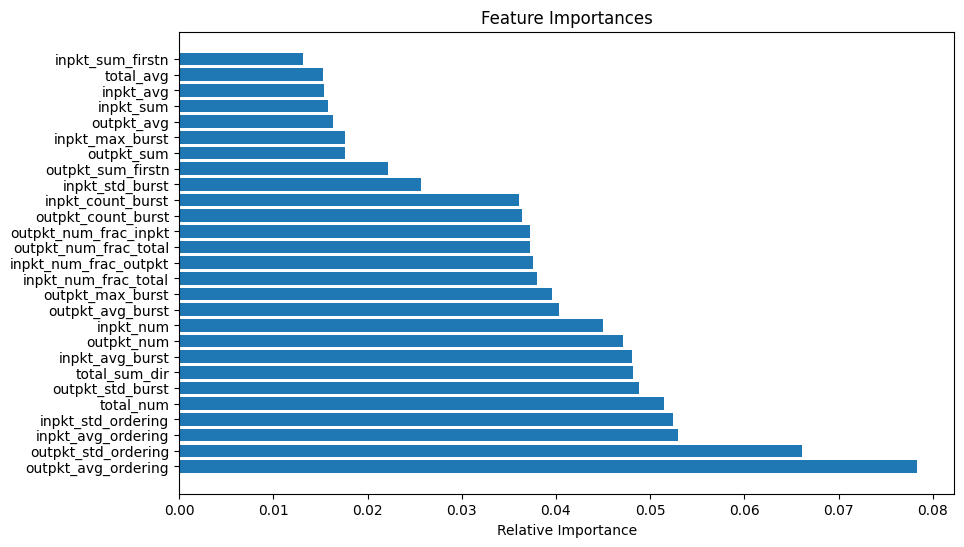

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


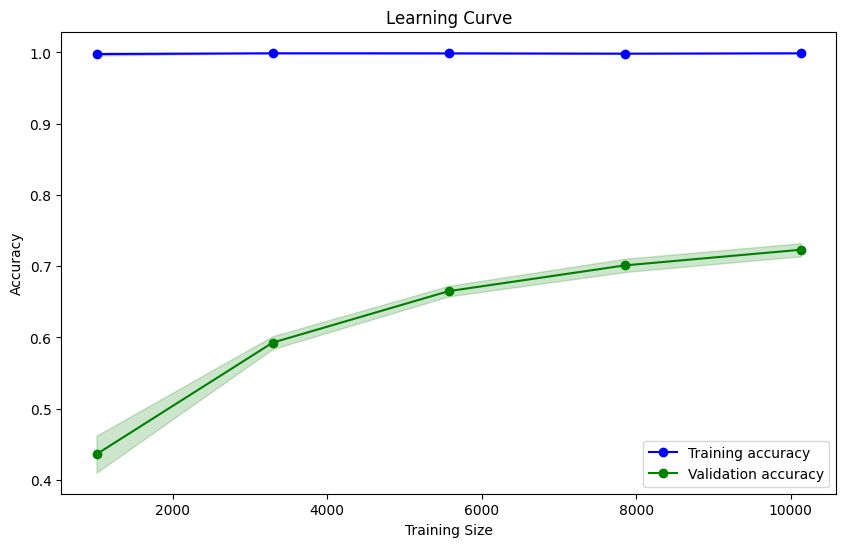

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-Validation Accuracy: 0.7387 ± 0.0081


In [15]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_closed_model = random_search.best_estimator_
y_pred = best_closed_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance 시각화
importances = best_closed_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])  # X_train을 사용
plt.xlabel("Relative Importance")
plt.show()


# 2. **Learning Curve 추가**
train_sizes, train_scores, test_scores = learning_curve(
    best_closed_model, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='o', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# 3. **Cross-Validation 적용**
cv_scores = cross_val_score(best_closed_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 4. **Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(95, 95))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# 클래스별 성능 평가 (정밀도, 재현율, F1-score 포함)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66        42
           1       0.66      0.50      0.57        42
           2       0.80      0.91      0.85        35
           3       0.73      0.93      0.82        29
           4       0.67      0.92      0.77        39
           5       0.93      0.87      0.90        45
           6       0.71      0.89      0.79        44
           7       0.67      0.89      0.76        36
           8       0.69      0.71      0.70        34
           9       0.51      0.68      0.58        31
          10       0.79      0.66      0.72        47
          11       0.84      0.74      0.79        35
          12       0.78      0.83      0.80        42
          13       0.59      0.40      0.48        40
          14       0.65      0.47      0.55        36
          15       0.72      0.80      0.76        35
          16       0.86      0.72      0.78        43
   

In [17]:
# 확률 예측 (predict_proba 활용)
y_pred_proba_selected = best_closed_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_selected, pos_label=1)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred_proba_selected, pos_label=1)
pr_auc = auc(recall_values, precision_values)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")


ROC AUC: 0.9137
Precision-Recall AUC: 0.5729


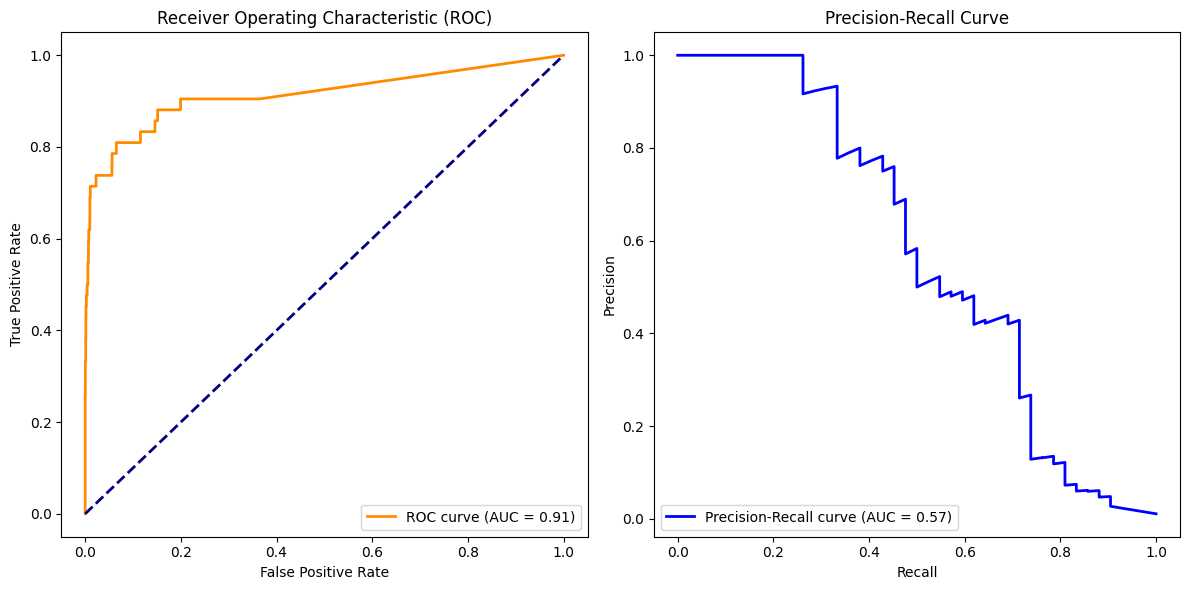

In [18]:
# Plot ROC and Precision-Recall Curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_values, precision_values, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()